In [ ]:
import pandas as pd

df = pd.read_csv('dataset_marketing_daily_6months.csv', parse_dates=["date"])

#Analisando as Informações que contem no dataset
#Verificando algumas metricas descritivas
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Ad_id          183 non-null    int64         
 1   date           183 non-null    datetime64[ns]
 2   nome_campanha  183 non-null    object        
 3   impressions    183 non-null    int64         
 4   reach          183 non-null    int64         
 5   frequency      183 non-null    float64       
 6   clicks         183 non-null    int64         
 7   ctr            183 non-null    float64       
 8   conversions    183 non-null    int64         
 9   spend          183 non-null    float64       
 10  cpc            183 non-null    float64       
 11  cpa            183 non-null    float64       
 12  roas           183 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(5), object(1)
memory usage: 18.7+ KB


,Ad_id,date,impressions,reach,frequency,clicks,ctr,conversions,spend,cpc,cpa,roas
count,183.0,183,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,1.0,2025-07-01 00:00:00,20994.043716,13676.125683,1.530055,581.754098,2.903060,25.043716,1054.718087,1.848142,49.962568,3.073497
min,1.0,2025-04-01 00:00:00,11252.000000,9013.000000,1.200000,375.000000,1.440000,7.000000,636.970000,1.260000,22.750000,0.450000
25%,1.0,2025-05-16 12:00:00,16244.500000,11749.500000,1.330000,518.500000,2.610000,23.000000,906.015000,1.525000,31.970000,2.440000
50%,1.0,2025-07-01 00:00:00,21063.000000,13916.000000,1.430000,580.000000,2.970000,26.000000,997.020000,1.730000,36.890000,3.270000
75%,1.0,2025-08-15 12:00:00,25608.000000,15460.500000,1.535000,648.500000,3.330000,29.000000,1162.530000,2.020000,47.180000,3.800000
max,1.0,2025-09-30 00:00:00,36167.000000,19363.000000,2.630000,864.000000,4.010000,39.000000,1906.760000,4.230000,235.300000,5.570000
std,0.0,NaN,5663.278981,2424.611921,0.325540,94.931726,0.561437,6.388370,231.213323,0.481308,36.074957,1.107450


In [13]:
#KPIs por mes
mes = (df.assign(month=df['date'].dt.to_period('M').astype(str))
       .groupby('month', as_index=False)
       .agg(spend=('spend', 'sum'),
            conversions=('conversions', 'sum'),
            cpa=('cpa', 'mean'),
            roas=('roas', 'mean')))

#Verificando Metricas spend, conversions,cpa e roas ao longo dos Meses
mes.head(6)

,month,spend,conversions,cpa,roas
0,2025-04,24669.95,803,31.268333,3.944667
1,2025-05,28729.69,896,32.616774,3.795806
2,2025-06,29564.50,852,35.309333,3.483667
3,2025-07,32024.88,849,38.222903,3.302258
4,2025-08,35157.26,786,45.400645,2.738710
5,2025-09,42867.13,397,118.079000,1.155333


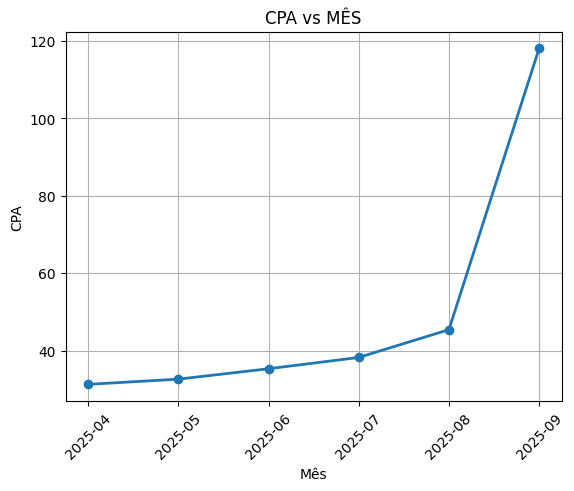

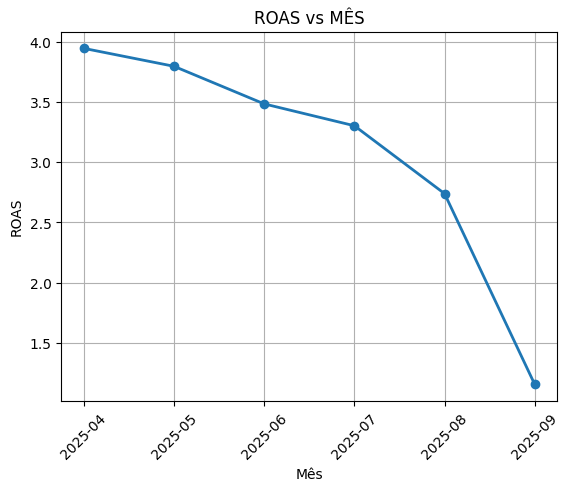

In [3]:
#Verificando Metricas CPA e ROAS ao longo dos Meses
import matplotlib.pyplot as plt

#grafico CPA vs mes
plt.plot(mes['month'], mes['cpa'], marker='o', linewidth=2)
plt.title('CPA vs MÊS')
plt.ylabel('CPA')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#grafico ROAS vs mes
plt.plot(mes['month'], mes['roas'], marker='o', linewidth=2)
plt.title('ROAS vs MÊS')
plt.ylabel('ROAS')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

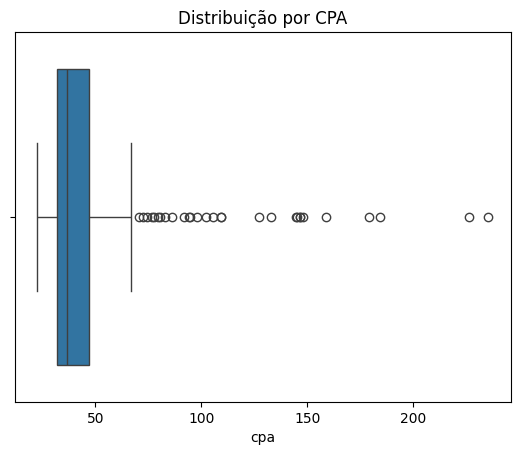

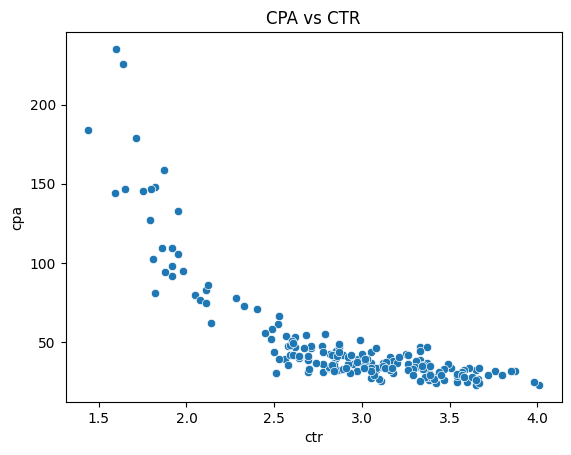

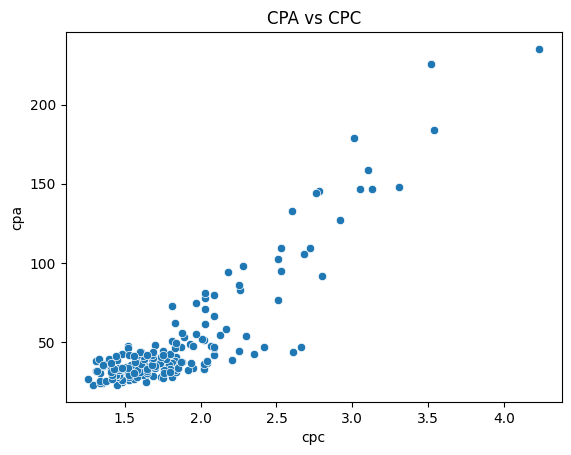

In [ ]:
#Fazendo algumas Comparações com a Metrica CPA
import seaborn as sns

sns.boxplot(x=df['cpa'])
plt.title('Distribuição por CPA')
plt.show()

sns.scatterplot(data=df, x='ctr', y='cpa')
plt.title('CPA vs CTR')
plt.show()

sns.scatterplot(data=df, x='cpc', y='cpa')
plt.title('CPA vs CPC')
plt.show()

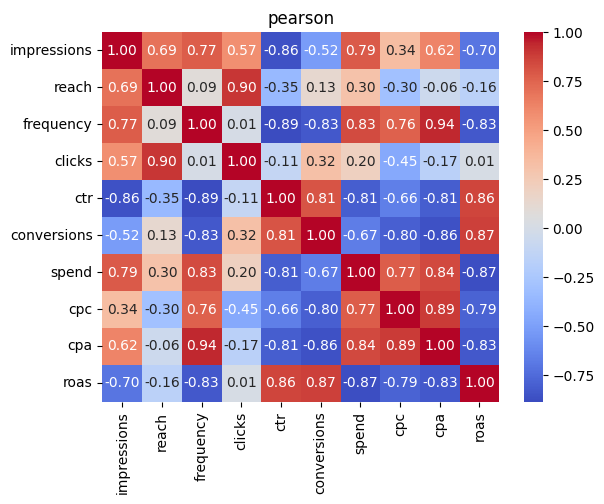

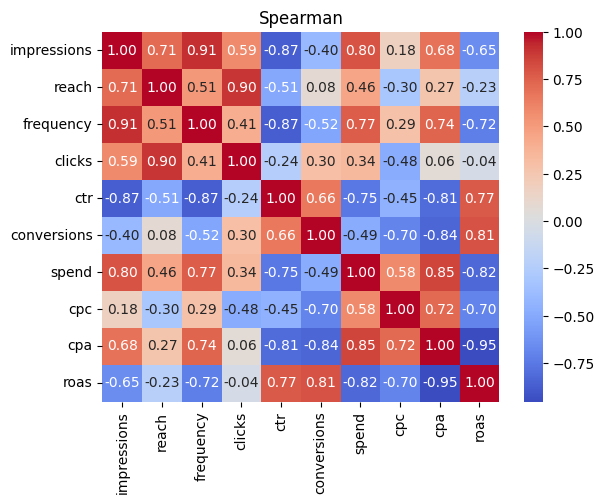

In [5]:
#Selecionando as colunas para verificar a correlação utilizando os metodos Pearson e Spearman
num_cols = ['impressions', 'reach', 'frequency','clicks','ctr','conversions','spend','cpc','cpa','roas']
corr = df[num_cols].corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('pearson')
plt.show()

corr_s = df[num_cols].corr(method='spearman')
sns.heatmap(corr_s, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Spearman')
plt.show()

In [ ]:

import numpy as np

# Pearson
corr = df[num_cols].corr(method='pearson')
cpa_corr = corr['cpa'].drop('cpa')  # remove a autocorrelação

# Top 3 positivas
top3_pos_cpa = cpa_corr.sort_values(ascending=False).head(3)
print("Top 3 correlações positivas com CPA (Pearson):")
print(top3_pos_cpa)

# Top 3 negativas
top3_neg_cpa = cpa_corr.sort_values(ascending=True).head(3)
print("\nTop 3 correlações negativas com CPA (Pearson):")
print(top3_neg_cpa)

# Spearman
corr_s = df[num_cols].corr(method='spearman')
cpa_corr_s = corr_s['cpa'].drop('cpa')

# Top 3 positivas
top3_pos_cpa_s = cpa_corr_s.sort_values(ascending=False).head(3)
print("\nTop 3 correlações positivas com CPA (Spearman):")
print(top3_pos_cpa_s)
#
# Top 3 negativas
top3_neg_cpa_s = cpa_corr_s.sort_values(ascending=True).head(3)
print("\nTop 3 correlações negativas com CPA (Spearman):")
print(top3_neg_cpa_s)



Top 3 correlações positivas com CPA (Pearson):
frequency    0.935201
cpc          0.888149
spend        0.838028
Name: cpa, dtype: float64

Top 3 correlações negativas com CPA (Pearson):
conversions   -0.857483
roas          -0.828423
ctr           -0.807294
Name: cpa, dtype: float64

Top 3 correlações positivas com CPA (Spearman):
spend        0.851477
frequency    0.737564
cpc          0.719561
Name: cpa, dtype: float64

Top 3 correlações negativas com CPA (Spearman):
roas          -0.954310
conversions   -0.836848
ctr           -0.811227
Name: cpa, dtype: float64


In [7]:
#Segmentação/Buckets de metricas
#Criar Buckets e comparar CPA médio entre os grupos

#Tabelas e Graficos de barras/boxplot por buckets
bins = [0, 1.30, 1.50, 1.80, 2.30, np.inf]
labels = ['<=1.30', '1.30 - 1.50', '1.50 - 1.80', '1.80 - 2.30', '>=2.30']
df['freq_buckets'] = pd.cut(df['frequency'], bins=bins, labels=labels, include_lowest=True)
bucket = (df.groupby('freq_buckets')
          .agg(n_ads=('Ad_id','count'),
               mean_cpa=('cpa', 'mean'),
               mean_roas=('roas', 'mean'),
               mean_freq=('frequency', 'mean'),
               spend=('spend', 'sum')).reset_index())
bucket

C:\Users\gr556\AppData\Local\Temp\ipykernel_21216\4161993094.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket = (df.groupby('freq_buckets')


,freq_buckets,n_ads,mean_cpa,mean_roas,mean_freq,spend
0,<=1.30,28,31.151071,3.964286,1.265000,23608.06
1,1.30 - 1.50,98,36.286020,3.445612,1.399796,96211.90
2,1.50 - 1.80,28,44.401429,2.883929,1.546429,31670.09
3,1.80 - 2.30,18,94.551667,1.338333,2.049444,24157.34
4,>=2.30,11,160.883636,0.812727,2.473636,17366.02


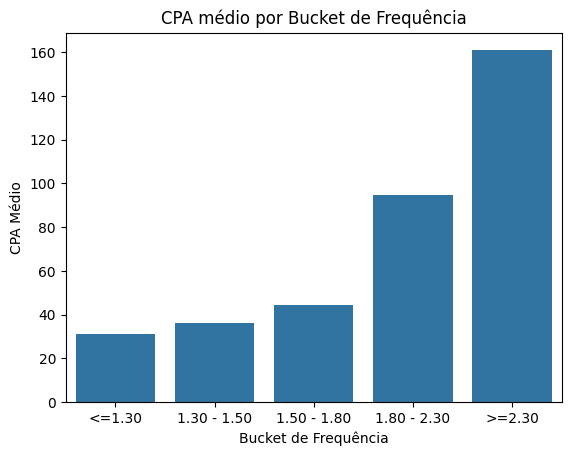

In [8]:
#Criando Gráfico de barras para ver como a Frequência se comporta em relação ao CPA médio
sns.barplot(bucket, x=labels, y=bucket['mean_cpa'])
plt.title('CPA médio por Bucket de Frequência')
plt.xlabel('Bucket de Frequência')
plt.ylabel('CPA Médio')
plt.show()

In [9]:
#Modelagem simples

#Regressão Linear CPA ~ Frequency + ctr + cpc + ... para ver sinal/força do coeficiente de Frequencia.
#Alternativa robusta: median regression ou transformar CPA(log-CPA)

import statsmodels.api as sm

X = df[['frequency', 'ctr', 'cpc']]
X = sm.add_constant(X)
y = df['cpa']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cpa   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1144.
Date:                Sat, 25 Oct 2025   Prob (F-statistic):          1.76e-116
Time:                        10:49:56   Log-Likelihood:                -640.44
No. Observations:                 183   AIC:                             1289.
Df Residuals:                     179   BIC:                             1302.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -137.2962     12.381    -11.089      0.0

In [12]:
#Teste de Correlação Spearman entre Frequency e CPA

#comparação de medias/medianas de CPA entre os buckets (ex: <=1.30 vs >=2.30), via t-test ou Mann-Whitney

from scipy import stats

low = df.loc[df['freq_buckets'] == "<=1.30", 'cpa']
high = df.loc[df['freq_buckets'] == ">=2.30", 'cpa']
print(stats.spearmanr(df['frequency'], df['cpa']))
print(stats.ttest_ind(low, high))

SignificanceResult(statistic=0.7375642366184543, pvalue=1.093869686764543e-32)
TtestResult(statistic=-15.886786272512255, pvalue=4.142666143909173e-18, df=37.0)
